In [1]:
# Task: Import the pandas and numpy package
import pandas as pd
import numpy as np

In [2]:
# Task: Load the dataset into dataframe called df
df = pd.read_csv('../data/raw/day.csv')

In [3]:
# Task: Create a copy of df and save it into a variable called df_cleaned
df_cleaned = df.copy()

In [4]:
# Task: Import your new function convert_to_date from src.features.dates and convert the column dteday with your function
from src.features.dates import convert_to_date
df_cleaned = convert_to_date(df_cleaned, ['dteday'])

In [5]:
# Task: Create a new dataframe prophet_df that contains only the columns dteday and cnt from df_cleaned
prophet_df = df_cleaned[['dteday', 'cnt']]

In [6]:
# Task: Rename the columns of prophet_df to ds and y
prophet_df.columns = ['ds', 'y']

In [7]:
# Task: Save the dataframe in the `data/processed/` folder
prophet_df.to_csv('../data/processed/day_prophet.csv', index=False)

In [8]:
# Task: Import the Prophet module from fbprophet
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [10]:
# Task: Instantiate the Prophet class into a variable called prophet
prophet = Prophet()

In [11]:
# Task: Fit the model with the prepared data
prophet.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -49.0898
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1230.03   0.000266863       51.6101           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       1230.12    0.00114882       56.3552   1.163e-05       0.001      238  LS failed, Hessian reset 
     199       1230.18   1.18144e-05       65.2958       0.436       0.436      318   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       1230.19   2.18344e-06       77.6715   3.389e-08       0.001      406  LS failed, Hessian reset 
     249       1230.19   9.92512e-09       81.8353      0.2048      0.2048      430   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [12]:
# Task: Import dump from joblib and save the fitted model into the folder models as a file called prophet_default
from joblib import dump 

dump(prophet,  '../models/prophet_default.joblib')

['../models/prophet_default.joblib']

In [13]:
# Task: Create a new dataframe containing future dates for next 6 months using make_future_dataframe()
future = prophet.make_future_dataframe(freq='D', periods=30*6)

In [14]:
# Task: Forecast the future dates with predict() and save the results in a variable called forecast
forecast = prophet.predict(future)

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


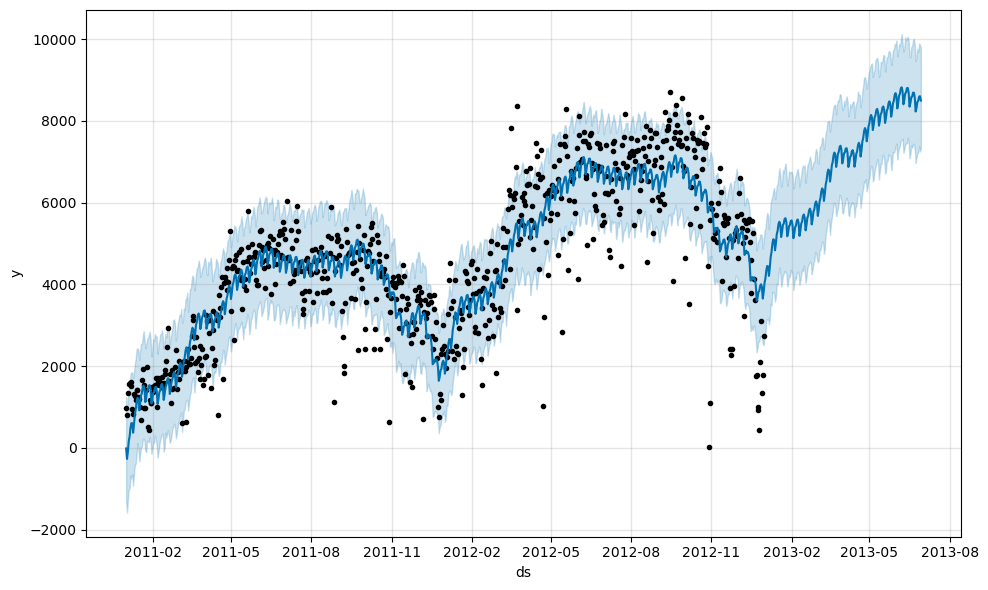

In [15]:
#Plot the forecasts of this model with `plot()`
fig1 = prophet.plot(forecast)

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


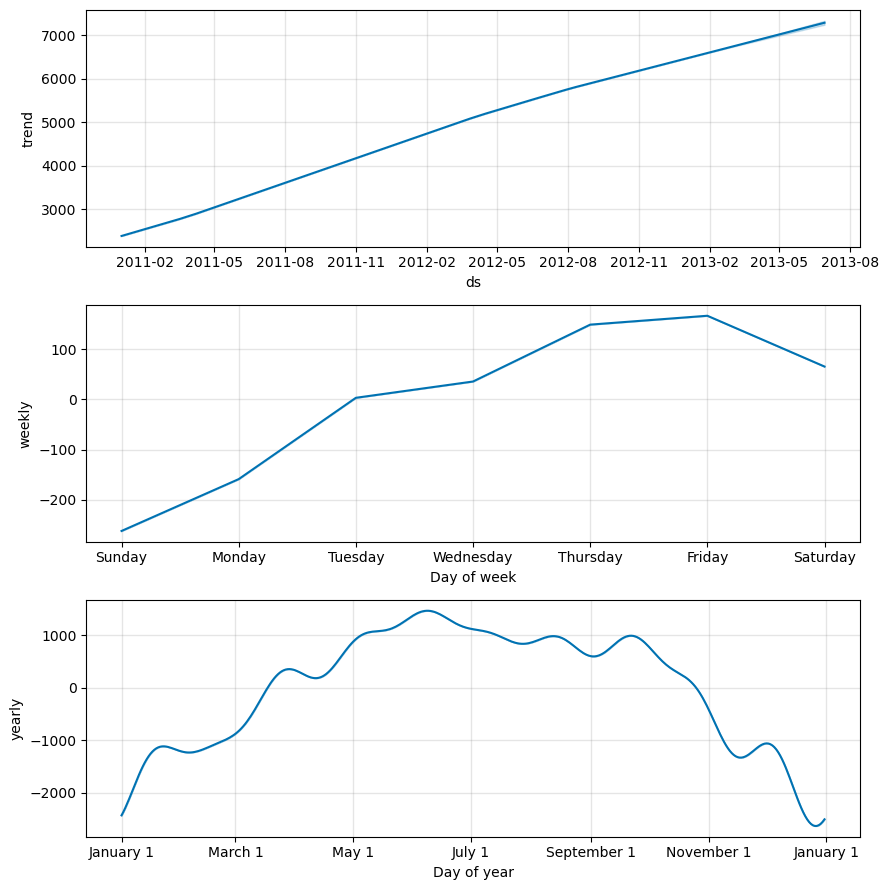

In [16]:
#Plot the components of this model with `plot_components()`
fig2 = prophet.plot_components(forecast)

In [17]:
# Task: Import cross_validation from fbprophet.diagnostics
from fbprophet.diagnostics import cross_validation

In [18]:
#Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')
cv_results = cross_validation(prophet, initial='365 days', period='7 days', horizon='7 days')

INFO:fbprophet:Making 52 forecasts with cutoffs between 2012-01-02 00:00:00 and 2012-12-24 00:00:00


  0%|          | 0/52 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.9966
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       616.526   0.000551095       85.9564       0.392       0.392      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       616.745   2.59115e-05       100.458   2.581e-07       0.001      239  LS failed, Hessian reset 
     191       616.747   2.01083e-08       100.493      0.2184      0.8004      274   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.1686
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       622.667     0.0003169       107.068   3.326e-06       0.001      159  LS failed, Hessian reset 
      99        622.72   5.34076e-05       105.977           1           1      174   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       622.724   1.05852e-08        92.606      0.2542      0.7883      216   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.2119
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       634.456   0.000479067       112.774   4.896e-06       0.001      169  LS failed, Hessian reset 
      99        634.48   0.000312171       95.6946           1           1      172   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       634.504   6.27882e-09       92.8685      0.2907      0.2907      226   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.2598
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       645.612    0.00039371       99.0568   3.863e-06       0.001      161  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     174       645.649   3.74557e-05       94.3737   3.396e-07       0.001      287  LS failed, Hessian reset 
     199       645.651   8.90618e-08       93.0871       0.494       0.494      318   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       645.651   3.61278e-08       78.0406           1           1      345   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.2732
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       653.355   0.000888311       100.708      0.7346      0.7346      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       653.444   1.88282e-08       99.9354      0.6361      0.6361      202   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -16.7895
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       663.498   2.02042e-06       98.3499      0.3153           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       663.743   0.000814703       95.2709   8.285e-06       0.001      220  LS failed, Hessian reset 
     156       663.905   0.000378853       96.5862   3.581e-06       0.001      276  LS failed, Hessian reset 
     199       663.944   0.000511187       92.2221      0.3809           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     282       664.085   2.84823e-08       101.146      0.8178      0.8178      427   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.9786
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       672.049   5.04369e-05       102.367           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     174       672.236     7.001e-07        99.704   6.884e-09       0.001      246  LS failed, Hessian reset 
     186       672.236   1.56878e-08       99.1504       0.198           1      262   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8

Initial log joint probability = -21.1456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      97       684.597   1.67995e-08       100.264      0.4547      0.4547      124   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.7254
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       693.461    0.00438623       100.467   4.129e-05       0.001      123  LS failed, Hessian reset 
      99       693.987   0.000138486       97.5663      0.4908      0.9841      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     156       694.234   0.000722307       100.599   7.518e-06       0.001      263  LS failed, Hessian reset 
     199       694.512   0.000549393       101.204           1           1      311   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     242       694.538   1.90058e-08        101.62      0.3154           1      364   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8

Initial log joint probability = -20.4759
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       703.827   4.17572e-07       99.1628      0.2692           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       703.827   3.53142e-08       100.953      0.2165           1      145   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.3278
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       713.002   0.000102914       97.6186           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       713.027   5.31932e-05       94.7389   5.326e-07       0.001      215  LS failed, Hessian reset 
     177       713.033   1.94773e-08       100.596      0.3187      0.3187      269   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -11.1783
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       822.033    0.00865756       113.584           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       822.193    0.00219575       109.107   2.113e-05       0.001      166  LS failed, Hessian reset 
     199        822.39   7.54341e-06       60.6888           1           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274       822.391   8.73891e-08       58.6801      0.2519           1      387   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.21724
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      80       851.255    0.00141735       102.131   1.545e-05       0.001      146  LS failed, Hessian reset 
      99       851.345   0.000116858       49.9808       1.914      0.5004      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       851.355   3.87216e-06       54.9157   5.407e-08       0.001      307  LS failed, Hessian reset 
     159       851.355    1.0461e-07       42.1293   3.172e-09       0.001      357  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.52764
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      70       863.805   0.000723214       59.9966   6.867e-06       0.001      123  LS failed, Hessian reset 
      83       864.005   5.87845e-05       43.8013    1.78e-06       0.001      185  LS failed, Hessian reset 
      91       864.006   2.21543e-06       39.3476   6.761e-08       0.001      234  LS failed, Hessian reset 
      99       864.006   2.04435e-07       46.3833      0.9599      0.3074      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       864.006   2.84255e-08       48.9693     0.06275     0.06275      251   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.20871
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      50       873.391    0.00546137       174.942   9.479e-05       0.001       92  LS failed, Hessian reset 
      98       874.729   6.51879e-08       43.2017     0.03502      0.7621      175   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.0244
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      85        887.42   2.16544e-05       46.0275   4.108e-07       0.001      146  LS failed, Hessian reset 
      99        887.42   1.53912e-06       45.6907      0.1618           1      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100        887.42   7.08002e-07       45.9496    1.55e-08       0.001      212  LS failed, Hessian reset 
     104        887.42   3.22903e-07       39.0265   8.337e-09       0.001      258  LS failed, Hessian reset 
     106        887.42   2.88911e-08       38.5886      0.1591           1      261   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.9244
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      54       869.278   1.14599e-06       39.4403   3.589e-08       0.001      130  LS failed, Hessian reset 
      58       869.278   8.73928e-08       32.9338      0.8362     0.08362      142   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.52444
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      74       880.357    0.00295106       71.6973   2.907e-05       0.001      128  LS failed, Hessian reset 
      87       880.419   1.75594e-05       29.9609   3.974e-07       0.001      190  LS failed, Hessian reset 
      93       880.419   1.98015e-07       38.2363   5.792e-09       0.001      240  LS failed, Hessian reset 
      95       880.419   9.63707e-08       29.9557   3.368e-09       0.001      277  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.86709
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       896.073   0.000314424        42.244      0.1106           1      141   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       896.077   2.24345e-05       38.8291   3.823e-07       0.001      200  LS failed, Hessian reset 
     126       896.078   1.26771e-09       30.3155   3.692e-11       0.001      269  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -20.172
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      38       898.658    0.00400554       80.9945   4.526e-05       0.001       85  LS failed, Hessian reset 
      99       898.944   1.34465e-06       75.3741     0.08974     0.08974      175   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       898.949   7.12321e-06       50.7971   9.287e-08       0.001      264  LS failed, Hessian reset 
     180       898.949   2.21776e-08       59.3566      0.2255      0.2255      319   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -12.718
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       906.422   1.53732e-06       68.9811     0.05162     0.05162      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       906.429   4.40745e-07       71.3955           1           1      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       906.429   1.23227e-06       71.5576   1.527e-08       0.001      328  LS failed, Hessian reset 
     210       906.429   6.36963e-08       66.6236     0.03194           1      336   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.79661
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      70       919.561    0.00241175       108.603   2.187e-05       0.001      131  LS failed, Hessian reset 
      99       919.844   0.000120768       96.5897           1           1      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       920.089    0.00106415       94.7666   1.078e-05       0.001      264  LS failed, Hessian reset 
     186       920.322   6.02554e-05       93.2082   6.465e-07       0.001      359  LS failed, Hessian reset 
     199       920.326   2.43598e-06       82.1014       1.873      0.1873      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       920.326   1.44587e-06       90.6067   1.492e-08       0.001      450  LS failed, Hessian reset 
     238       920.326   6.49491e-08       67.7458           1   

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.9079
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      85       927.803    0.00240176       101.511   2.517e-05       0.001      138  LS failed, Hessian reset 
      99       928.016   1.34241e-05       97.0241      0.3413      0.3413      156   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       928.026   8.84947e-09       85.7703      0.1508      0.1508      212   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.2184
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84       942.911    0.00317028       164.823   2.632e-05       0.001      139  LS failed, Hessian reset 
      99       943.207   0.000244667        83.448           1           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       943.233   3.42879e-05       85.5479   3.179e-07       0.001      289  LS failed, Hessian reset 
     199       943.235   1.15936e-07       68.7082      0.8156      0.8156      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       943.235   5.61593e-08       71.2612           1           1      340   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -11.8405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       952.908   0.000186447       100.483      0.7138      0.7138      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       952.921   1.95228e-08       94.0333       0.182           1      186   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.2576
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      67       964.187    0.00664505       252.201   5.855e-05       0.001      121  LS failed, Hessian reset 
      99       964.917   0.000387158        97.181      0.7981      0.7981      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       966.785   1.83439e-05       102.695           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       966.812   5.11794e-07       102.223      0.6724      0.6724      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       966.813   3.64813e-06       99.9082   3.739e-08       0.001      447  LS failed, Hessian reset 
     324       966.813   8.18617e-09       94.4445     0.07815           1      471   
Optimization terminat

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.1323
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       977.534   0.000673284       94.3641   5.796e-06       0.001      146  LS failed, Hessian reset 
      99       977.572   1.41277e-05       75.1166      0.3127           1      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       977.575   6.85705e-08       86.9274      0.4274           1      205   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.1325
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       986.776    2.6709e-05       75.9972      0.7991      0.7991      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       986.793   8.80534e-05       110.286   1.024e-06       0.001      199  LS failed, Hessian reset 
     144       986.802   1.50045e-05       93.2271   2.163e-07       0.001      269  LS failed, Hessian reset 
     179       986.803   3.67592e-08       90.3352      0.2558           1      316   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.2324
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1001.29   0.000303625       67.2786      0.3042      0.3042      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       1001.37   2.02836e-08         85.38     0.09322           1      255   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.3454
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1012.29    0.00133523       78.8734      0.1442           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       1012.33   0.000649423       63.8467   8.385e-06       0.001      176  LS failed, Hessian reset 
     155       1012.54   0.000139091        101.31   1.594e-06       0.001      293  LS failed, Hessian reset 
     189       1012.56   5.65524e-06       80.5549   6.052e-08       0.001      372  LS failed, Hessian reset 
     199       1012.56   4.25163e-07       79.3674       0.139           1      388   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       1012.56   4.47848e-08       77.2647      0.3192           1      413   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.4246
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      70       1023.68    0.00165964        158.93   1.212e-05       0.001      117  LS failed, Hessian reset 
      99       1024.05   9.58074e-05       81.7502           1           1      151   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143        1024.7    0.00273328       96.8091   2.772e-05       0.001      251  LS failed, Hessian reset 
     199       1024.89   6.83233e-05       97.0941           1           1      315   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260        1024.9   3.34194e-08       82.2341      0.2896           1      393   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.3083
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      93       1038.61   0.000735557       97.6388   7.667e-06       0.001      167  LS failed, Hessian reset 
      99       1038.67   0.000124069       85.6564      0.5214      0.5214      175   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       1038.74   0.000180167       96.8444   1.531e-06       0.001      262  LS failed, Hessian reset 
     199       1038.77   1.85877e-07       102.907        0.35        0.35      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       1038.77   7.10078e-08       97.1775      0.6097      0.6097      356   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.2599
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1052.55   4.58599e-05        90.602      0.2508      0.2508      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       1052.77   0.000579931       84.7188   6.932e-06       0.001      200  LS failed, Hessian reset 
     199       1052.97   3.47342e-06       100.072      0.6774      0.6774      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       1052.97   1.35821e-06       95.9817    1.38e-08       0.001      323  LS failed, Hessian reset 
     219       1052.97   3.48216e-08       81.9036           1           1      347   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.5414
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1064.24   8.21498e-05        61.424       1.015      0.1015      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1064.71   5.30029e-05       68.6999      0.2473           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       1064.71   9.92894e-09       77.8013     0.03586     0.03586      301   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.3586
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      70       1076.44    0.00321344        241.42   2.898e-05       0.001      117  LS failed, Hessian reset 
      99       1077.21   0.000233227       97.5874           1           1      152   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     156       1077.44    0.00214794       98.6372   2.728e-05       0.001      296  LS failed, Hessian reset 
     199       1077.82   3.20886e-06       100.874      0.8329      0.8329      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       1077.82   4.42617e-08       86.8018      0.2138           1      378   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -11.9127
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      73       1090.38    0.00139036       164.683   1.123e-05       0.001      125  LS failed, Hessian reset 
      99       1090.61   4.69236e-05       95.1626      0.8759      0.8759      154   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115        1090.7    0.00034245       106.589   3.403e-06       0.001      210  LS failed, Hessian reset 
     199       1090.99    0.00123269       94.1762      0.1322      0.4159      320   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200          1091    0.00164742       115.774   1.749e-05       0.001      359  LS failed, Hessian reset 
     299       1091.09   1.15525e-06       77.4925      0.8464      0.8464      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.6431
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1101.68    0.00012633       103.977      0.6668      0.6668      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     125       1101.79   0.000753991       111.305    6.47e-06       0.001      184  LS failed, Hessian reset 
     195       1102.15    0.00215465       100.139    1.86e-05       0.001      308  LS failed, Hessian reset 
     199        1102.2   0.000183155       43.8253      0.4927      0.4927      312   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1102.24   2.19953e-06       94.8532           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       1102.24   1.97932e-05        69.755   2.755e-07       0.001      516  LS failed, Hessian rese

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.93761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      59       1137.17    0.00222258       208.508   2.414e-05       0.001      108  LS failed, Hessian reset 
      99       1137.93    0.00188684       84.6876           1           1      152   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       1138.03   0.000668765       94.8155   6.069e-06       0.001      190  LS failed, Hessian reset 
     163       1138.14   3.45402e-08       69.7497      0.2698      0.2698      274   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.88738
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      60       1143.47    0.00132963       142.763   1.296e-05       0.001      114  LS failed, Hessian reset 
      99       1144.61    0.00358332         99.62           1           1      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101        1144.7    0.00133737       87.9538   1.534e-05       0.001      197  LS failed, Hessian reset 
     199       1144.84     5.563e-05       74.5893      0.4943      0.4943      318   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     281        1144.9   0.000416241       65.2061    5.91e-06       0.001      502  LS failed, Hessian reset 
     299       1144.93   2.41812e-05       70.5812      0.1833           1      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.3523
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1159.16   4.35866e-05       74.0481      0.6741      0.6741      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       1159.18   6.01113e-05       87.4317   8.737e-07       0.001      194  LS failed, Hessian reset 
     145       1159.19   2.49674e-08       77.8406      0.2437           1      241   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.2981
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1162.62   1.78642e-05       70.2234           1           1      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1162.63   8.56901e-07       83.9186       0.906       0.906      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       1162.63   5.89046e-08       62.1774     0.05331           1      315   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -13.657
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      65       1176.74   0.000808444       76.2133   1.137e-05       0.001      122  LS failed, Hessian reset 
      99       1176.84   1.69448e-06        61.397      0.1533      0.4637      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     184       1176.85   2.29591e-07        65.572   3.373e-09       0.001      324  LS failed, Hessian reset 
     185       1176.85   7.58525e-08       57.5064           1           1      325   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.4135
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1188.77   1.56386e-06       57.7272     0.08201    0.008201      145   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1188.8   2.92003e-07       60.2297      0.2703      0.2703      272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1188.81   2.39476e-07       67.8203      0.1712           1      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     302       1188.81   5.30412e-08       67.1823      0.2173           1      415   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -93.3285
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1174.5    0.00896281       89.8499           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124        1175.3    0.00320238       68.3517   3.052e-05       0.001      194  LS failed, Hessian reset 
     199       1175.41   2.22035e-07       36.6798      0.5456      0.5456      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       1175.41   1.04282e-07       58.2885       0.326           1      317   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.5559
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      59        1176.4   0.000179524        57.233   2.155e-06       0.001      111  LS failed, Hessian reset 
      99       1176.41     5.491e-07       75.5161           1           1      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       1176.41   6.50019e-08       63.7694      0.2316      0.5573      190   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -13.5307
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      62        1188.6   0.000607938       83.4108    7.15e-06       0.001      111  LS failed, Hessian reset 
      99       1189.08    0.00738069       71.8798      0.1962           1      156   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       1189.22   8.84601e-06       78.6589    1.47e-07       0.001      290  LS failed, Hessian reset 
     198       1189.22    8.7591e-08       68.2837     0.03209      0.3499      332   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.6427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      67       1203.41   0.000807702       83.5669   1.302e-05       0.001      120  LS failed, Hessian reset 
      99       1203.47    9.6376e-06       47.0773       0.557       0.557      168   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       1203.47   3.13952e-05       64.4174   4.247e-07       0.001      209  LS failed, Hessian reset 
     154       1203.47   4.59979e-07       65.7391    7.27e-09       0.001      307  LS failed, Hessian reset 
     158       1203.47   9.14113e-08       42.4019           1           1      313   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -20.8983
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1201.8    1.7362e-07       85.4936      0.4851      0.4851      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107        1201.8    9.0634e-08       88.0916      0.2868      0.2868      137   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -14.7677
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      87       1215.57   0.000810645       97.1969   7.839e-06       0.001      148  LS failed, Hessian reset 
      99       1215.63   7.85611e-05       86.0397           1           1      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159       1215.67   7.85749e-06       106.944   8.485e-08       0.001      301  LS failed, Hessian reset 
     184       1215.67   1.07423e-07       92.5076           1           1      333   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8

Initial log joint probability = -20.9593
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      82       1228.23   7.90523e-08       84.1758           1           1      106   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.0571
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1242.76   5.31442e-05       87.8729      0.9813      0.9813      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       1242.78   0.000183169       101.867   1.883e-06       0.001      184  LS failed, Hessian reset 
     194        1242.8   4.00471e-08       84.1658      0.5873      0.5873      294   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.9283
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1238.47   0.000868294       72.0283      0.6131      0.6131      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       1238.94    0.00123485       81.6404   1.598e-05       0.001      184  LS failed, Hessian reset 
     199        1239.1   0.000576694       83.1032           1           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       1239.15   0.000576277       82.7841   6.271e-06       0.001      334  LS failed, Hessian reset 
     299       1239.27   5.42039e-05       77.5484           1           1      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     379       1239.96    0.00387283       116.003   2.927e-05       0.001      574  LS failed, Hessian rese

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [19]:
# Task: Import performance_metrics from fbprophet.diagnostics
from fbprophet.diagnostics import performance_metrics

In [20]:
#Calculate performance metrics on the cross validation
metrics_results = performance_metrics(cv_results)

In [21]:
# Task: Import plot_cross_validation_metric from fbprophet.plot
from fbprophet.plot import plot_cross_validation_metric

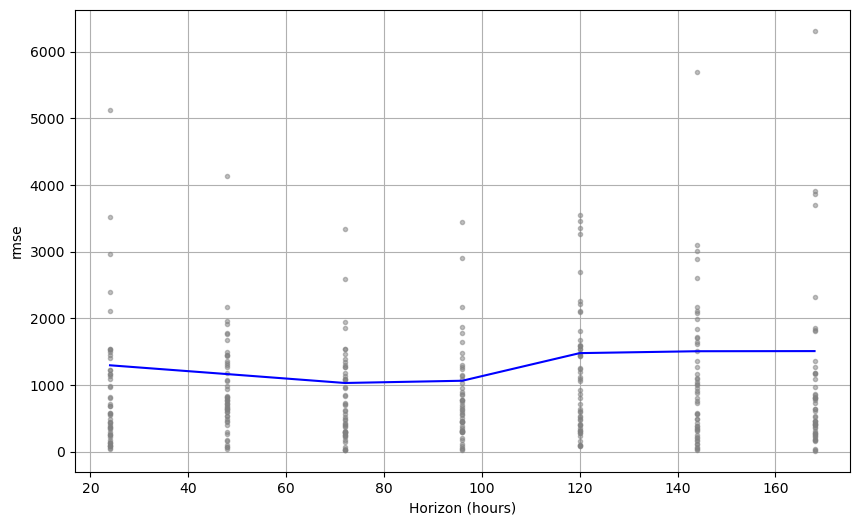

In [22]:
#Plot the RMSE score with `plot_cross_validation_metric()` on the cross validation results
fig3 = plot_cross_validation_metric(cv_results, metric='rmse')

In [23]:
# Task: Instantiate the Prophet class into a variable called prophet1
prophet1 = Prophet()

In [24]:
#Add the US holidays component to the model
prophet1.add_country_holidays(country_name='US')

In [25]:
# Task: Fit the model with the prepared data
prophet1.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -49.0898
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       1245.21   0.000386202       69.6874   4.513e-06       0.001      148  LS failed, Hessian reset 
      99       1245.22   4.17826e-05        48.839       0.465       0.465      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       1245.23   1.01992e-05       83.3286   1.965e-07       0.001      275  LS failed, Hessian reset 
     175       1245.23   2.34063e-08       51.2432      0.1594           1      305   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [26]:
# Task: Save the fitted model into the folder models as a file called prophet_holiday.joblib
dump(prophet1,  '../models/prophet_holiday.joblib')

['../models/prophet_holiday.joblib']

In [27]:
# Task: Forecast the future dates with predict() and save the results in a variable called forecast1
forecast1 = prophet1.predict(future)

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


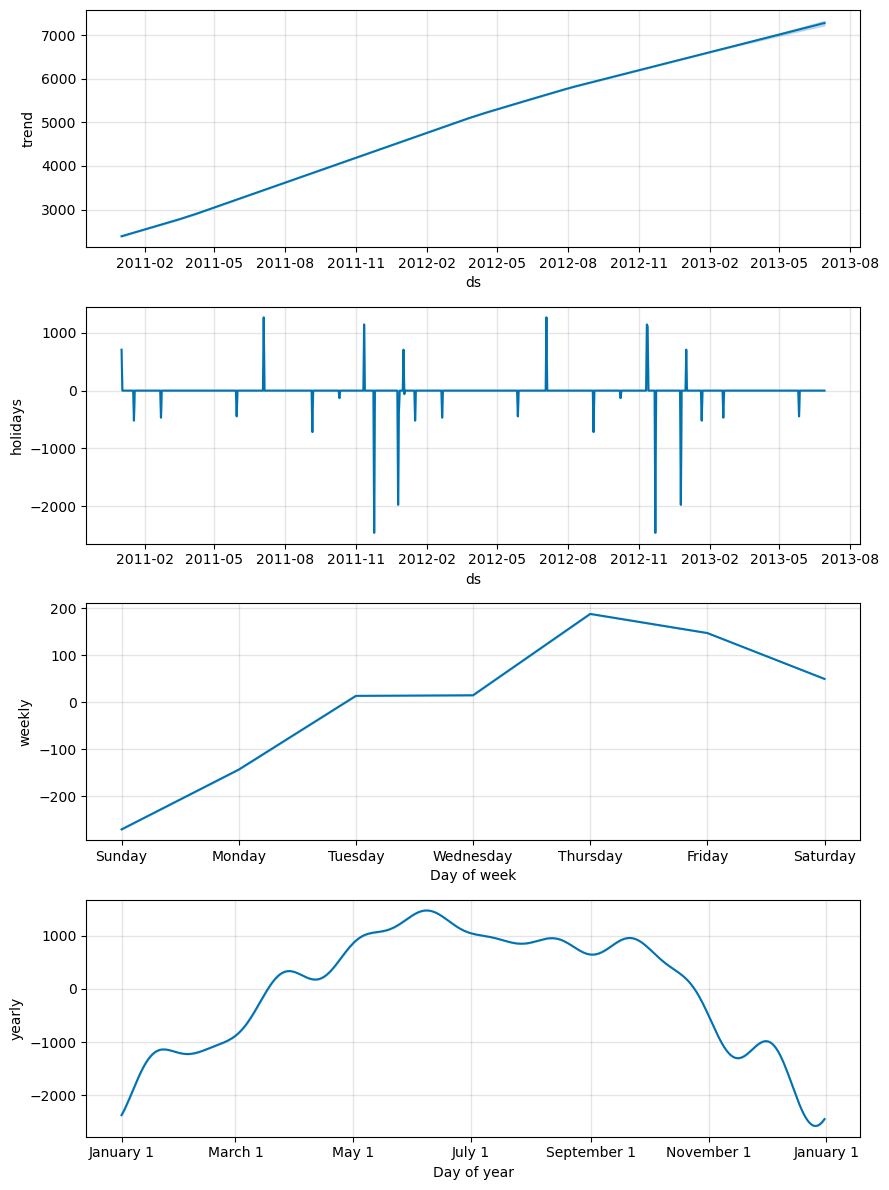

In [28]:
# Task: Print the components of this model on the predictions
fig1 = prophet1.plot_components(forecast1)

In [29]:
# Task: Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')
cv_results1 = cross_validation(prophet1, initial='365 days', period='7 days', horizon='7 days')

INFO:fbprophet:Making 52 forecasts with cutoffs between 2012-01-02 00:00:00 and 2012-12-24 00:00:00


  0%|          | 0/52 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.9966
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      85       627.992    8.7691e-05       97.3956   8.708e-07       0.001      142  LS failed, Hessian reset 
      99           628   1.98056e-06       98.8343      0.4036      0.4036      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121           628   2.04325e-08       98.3125      0.6683      0.6683      186   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.1686
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       635.867   6.85187e-06       95.5118      0.4044      0.4044      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       635.954   0.000449723       82.7272   5.163e-06       0.001      204  LS failed, Hessian reset 
     199       636.042    3.6256e-05       105.587   3.632e-07       0.001      314  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     276        636.06   6.85063e-09        79.313     0.04851           1      411   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.2119
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       648.086   1.75422e-05       102.575      0.5197      0.5197      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       648.122   0.000360423       92.2519   3.527e-06       0.001      164  LS failed, Hessian reset 
     187       648.175   7.13495e-09        101.87       0.159       0.159      259   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.2598
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       659.189   1.52246e-05       100.602      0.5064      0.5064      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       659.191   6.73265e-09       103.514      0.3377      0.3377      153   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.2732
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       666.744   4.91605e-06       94.3134           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       666.781   0.000733976       96.1007    6.64e-06       0.001      212  LS failed, Hessian reset 
     199       666.859    0.00261603       118.816           1           1      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     279       666.989   2.46541e-08        100.84      0.2436           1      397   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -16.7895
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       677.165   7.37107e-05       97.9329       2.786      0.2786      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       677.387   5.73754e-07       103.948      0.5397      0.5397      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       677.389   3.39859e-06       94.7965   3.197e-08       0.001      340  LS failed, Hessian reset 
     258       677.389   5.21703e-08       96.7636      0.2654           1      364   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.9786
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        685.07   0.000712721       101.549      0.8007      0.8007      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       685.091   1.98888e-08        100.45      0.6643      0.6643      176   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.1456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       697.308   4.87251e-07       100.338      0.3067      0.3067      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       697.308   8.39666e-09       100.352      0.2502      0.2502      158   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.7254
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       707.669   1.65751e-07        92.283      0.3144           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       707.669    1.9795e-08       98.9029      0.3523           1      134   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -20.4759
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88        716.95   0.000518213       100.579   5.083e-06       0.001      145  LS failed, Hessian reset 
      99       716.998   2.68858e-05       99.4341      0.9663      0.6482      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126           717   1.85619e-08       98.4302      0.3252           1      196   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.3278
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       726.132    0.00290977       101.796           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       726.186     1.362e-08       100.541      0.3043           1      181   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -11.1783
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      85       834.885   0.000364318       51.4364   1.077e-05       0.001      136  LS failed, Hessian reset 
      90        834.89   8.05521e-05       21.2926   1.077e-06       0.001      183  LS failed, Hessian reset 
      93       834.892   1.86107e-05       20.1441   5.506e-07       0.001      218  LS failed, Hessian reset 
      99       834.892   4.67383e-06       42.8897           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       835.023   2.44943e-05       56.2298      0.4461      0.4461      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       835.039    3.4494e-05       61.4312   6.578e-07       0.001      450  LS failed, Hessian reset 
     279       835.047   3.15409e-06       44.2029    4.33e-08   

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.21724
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      55       862.762    0.00363177       61.9299   4.132e-05       0.001       96  LS failed, Hessian reset 
      73       863.139   0.000223324       41.7764   7.229e-06       0.001      162  LS failed, Hessian reset 
      91        863.15    1.4481e-06        31.595   4.136e-08       0.001      234  LS failed, Hessian reset 
      99        863.15   5.39307e-08       31.5862      0.5363     0.05363      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100        863.15    1.1124e-08       41.8918     0.05044      0.6477      251   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.52764
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       876.018   0.000824053       47.6804           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       876.022   1.71116e-05       38.0889   4.778e-07       0.001      182  LS failed, Hessian reset 
     113       876.022    2.4347e-07       37.3173   6.295e-09       0.001      233  LS failed, Hessian reset 
     114       876.022   8.94878e-08       34.3991           1           1      234   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.20871
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      60       886.273    0.00163961       136.458   1.352e-05       0.001      116  LS failed, Hessian reset 
      75       886.524   0.000560906       53.5378   1.042e-05       0.001      180  LS failed, Hessian reset 
      88        886.55   1.04561e-05       47.6668   2.894e-07       0.001      240  LS failed, Hessian reset 
      99        886.55   5.29946e-07        33.792           1           1      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101        886.55   1.88565e-07       33.5245   4.837e-09       0.001      307  LS failed, Hessian reset 
     103        886.55     3.962e-08       43.6072      0.1849           1      310   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.0244
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      70       898.832    0.00153793       164.226   1.356e-05       0.001      124  LS failed, Hessian reset 
      84       899.148   0.000612498       44.3022   1.475e-05       0.001      167  LS failed, Hessian reset 
      99       899.171   0.000176212       54.8217       1.797       0.562      188   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        899.29   0.000202147       50.8651      0.3186      0.8905      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     262       899.346   1.04548e-07       48.1889     0.07119           1      433   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.9244
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      67        879.22   0.000233559       46.8549   6.228e-06       0.001      128  LS failed, Hessian reset 
      80       879.299   0.000598036       47.7417   7.963e-06       0.001      182  LS failed, Hessian reset 
      92       879.312   4.13721e-06       60.3315   1.084e-07       0.001      237  LS failed, Hessian reset 
      99       879.312   8.32342e-07       32.3101       4.597      0.4597      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       879.443     0.0001853       63.0362   4.169e-06       0.001      316  LS failed, Hessian reset 
     146       879.467   4.16625e-05        39.889   1.085e-06       0.001      403  LS failed, Hessian reset 
     167       879.473   2.83419e-07       36.1603   9.827e-09       0.001      484  LS failed, Hessian reset 
     170       879.473

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.52444
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       890.535   0.000321162       54.0622   3.982e-06       0.001      162  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       890.549   6.26006e-06       33.6046   1.032e-07       0.001      263  LS failed, Hessian reset 
     143       890.549     4.186e-10       43.3639   0.0001999      0.3533      273   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.86709
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      54       906.033   0.000674778       41.1935    1.83e-05       0.001      106  LS failed, Hessian reset 
      82       906.213   0.000228446       57.7505   4.341e-06       0.001      197  LS failed, Hessian reset 
      99       906.218   4.05749e-07       38.8686           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       906.218   3.73274e-07       24.8092   8.085e-09       0.001      267  LS failed, Hessian reset 
     104       906.218   2.92534e-08       38.8652     0.01078           1      274   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -20.172
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88       908.489   0.000105439       53.2011   1.793e-06       0.001      152  LS failed, Hessian reset 
      99       908.509   4.41875e-05       70.0539      0.9666     0.09666      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       908.595   7.95221e-05       85.8615      0.3305           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       908.657   2.83518e-05       65.8364    6.28e-07       0.001      480  LS failed, Hessian reset 
     299       908.659   3.03821e-05        49.042           1           1      485   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       908.706   2.48905e-06       99.8989      0.8836      0.8836      608   
    Iter      log prob

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -12.718
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        915.02   5.51297e-05       110.041       0.625       0.625      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       915.398    0.00170985       147.885   1.596e-05       0.001      200  LS failed, Hessian reset 
     199        915.52   3.85794e-07       92.3446           1           1      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       915.521   4.41164e-08       66.1409      0.2936      0.2936      315   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.79661
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       929.442   0.000553659       69.2066           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       929.475   8.78054e-05       40.6929   1.162e-06       0.001      167  LS failed, Hessian reset 
     198       929.547   7.02104e-05       92.4052   8.562e-07       0.001      312  LS failed, Hessian reset 
     199       929.549   3.48381e-05       81.3864           1           1      313   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     253       929.554   4.11238e-07       84.3842   3.923e-09       0.001      414  LS failed, Hessian reset 
     260       929.554   4.71912e-08       72.9847      0.5768      0.5768      421   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.9079
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       937.114   0.000595902       71.6841           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     180       937.239   0.000535956       100.843    6.18e-06       0.001      272  LS failed, Hessian reset 
     199       937.261   6.25649e-06       71.9901      0.5829      0.5829      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       937.263   6.64033e-06       104.368   7.002e-08       0.001      380  LS failed, Hessian reset 
     270       937.264   4.38762e-08       86.0214           1           1      425   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.2184
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       952.496   7.45017e-05       92.8907           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       952.519   0.000100997       84.0992   1.319e-06       0.001      169  LS failed, Hessian reset 
     153       952.524   1.22312e-06       94.0354   1.472e-08       0.001      271  LS failed, Hessian reset 
     171       952.524   4.63859e-08       62.9572       0.768       0.768      294   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -11.8405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       962.189    0.00156121       93.2257      0.6114      0.6114      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       962.267   6.03744e-05       91.8294   6.449e-07       0.001      215  LS failed, Hessian reset 
     199       962.278   1.69187e-06       74.1772      0.9183      0.9183      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       962.289   0.000156586       78.8282   1.846e-06       0.001      402  LS failed, Hessian reset 
     299       962.304   1.44585e-07       63.7889           1           1      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       962.304    2.3369e-08        88.228      0.1878           1      495   
Optimization terminat

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.2576
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       975.917    5.0619e-05       80.0419      0.2986      0.2986      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       976.051   0.000883799       113.339   9.168e-06       0.001      192  LS failed, Hessian reset 
     151       976.127   0.000129893       96.3168   1.322e-06       0.001      266  LS failed, Hessian reset 
     178       976.135   3.06603e-08       86.4619      0.3268           1      304   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.1323
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      69       986.575     0.0010889       108.066   9.226e-06       0.001      125  LS failed, Hessian reset 
      99       986.746   1.59552e-06       82.8049      0.6267      0.6267      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       986.759    8.2486e-05       103.268   8.193e-07       0.001      238  LS failed, Hessian reset 
     181       986.764   2.03932e-08        90.234      0.3166           1      299   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.1325
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       996.634   6.96871e-05       76.1192       0.195           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       996.793    0.00146621       70.3638           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273        996.94   4.07816e-08       77.2537           1           1      335   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.2324
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1011.14   4.62469e-05       99.2009           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       1011.16   2.22319e-05        98.434   2.229e-07       0.001      211  LS failed, Hessian reset 
     169       1011.16   4.16598e-08       82.9996      0.2385           1      259   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.3454
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       1022.42   0.000238953       93.8698   2.812e-06       0.001      146  LS failed, Hessian reset 
      99       1022.43   3.17005e-05       78.4262       0.893       0.893      156   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1022.6   7.21363e-07       69.5984     0.06263           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223        1022.6   7.24255e-08       57.8624      0.7383      0.7383      314   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.4246
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      74       1034.75    0.00167388       120.209    1.78e-05       0.001      119  LS failed, Hessian reset 
      99       1034.87   3.41036e-06       87.0729      0.3455      0.3455      149   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       1034.88   3.27521e-05       89.3217   3.029e-07       0.001      207  LS failed, Hessian reset 
     173       1034.88   7.14338e-08       85.7851      0.3726      0.3726      271   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.3083
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      80        1048.7   0.000521576       66.5798   9.358e-06       0.001      150  LS failed, Hessian reset 
      99        1048.8   0.000699638       101.327           1           1      172   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       1048.88    2.1027e-05       93.1994   2.134e-07       0.001      290  LS failed, Hessian reset 
     191       1048.88   2.97401e-08        86.735      0.6245      0.6245      323   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.2599
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1062.94   0.000275911       84.7397           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171       1062.96   5.47764e-08        95.074      0.2917           1      212   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.5414
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1074.35   4.06101e-05       82.3162      0.2221      0.2221      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       1074.37   5.21927e-08       88.7045           1           1      215   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.3586
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1087.82   4.76158e-05       95.2735       1.119      0.1119      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       1087.83   3.86343e-08       91.0459      0.3478           1      233   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -11.9127
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1100.81   0.000497157       82.6324       0.853       0.853      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     144       1101.21    0.00102385       109.077   9.661e-06       0.001      216  LS failed, Hessian reset 
     199       1101.35   7.42788e-05       93.9939       0.557       0.557      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     257       1101.36   3.77373e-06       102.335   3.694e-08       0.001      384  LS failed, Hessian reset 
     277       1101.36   4.37368e-08       77.4942      0.2302      0.8164      410   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.6431
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      76       1112.44     0.0019997       151.829   2.531e-05       0.001      123  LS failed, Hessian reset 
      99       1112.68    0.00382616        116.96           1           1      154   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       1112.83   0.000435193       88.8005   4.681e-06       0.001      217  LS failed, Hessian reset 
     199       1112.88   2.41749e-06       66.5542      0.3228           1      312   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1112.95   1.14552e-05       98.0572      0.7382      0.7382      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     345       1112.95   1.31767e-07        86.491           1           1      492   
Optimization terminat

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.93761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      94       1148.64   0.000463776       91.6574   5.419e-06       0.001      151  LS failed, Hessian reset 
      99       1148.67   0.000144409       81.5304      0.2901           1      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     182       1148.77   0.000369985       98.9114   6.625e-06       0.001      301  LS failed, Hessian reset 
     199       1148.79   0.000110287       91.5916       3.761      0.3761      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     257       1148.81   4.60346e-06       86.4321   6.523e-08       0.001      436  LS failed, Hessian reset 
     276       1148.81   5.17838e-08       73.2727      0.1636      0.3988      461   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.88738
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1155.11    4.3913e-05        38.364      0.2998           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1155.14   9.56078e-07       70.7803           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       1155.14   3.57112e-08       60.8941      0.2517           1      268   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.3523
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1169.07   1.87206e-06       68.6009      0.4054      0.4054      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     192       1169.46   2.74731e-05       87.8966   3.814e-07       0.001      275  LS failed, Hessian reset 
     199       1169.47    9.0432e-06       70.0269           1           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       1169.48   3.18478e-07       65.5608   5.043e-09       0.001      384  LS failed, Hessian reset 
     249       1169.48    6.9768e-08       48.5934      0.2781           1      386   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.2981
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1171.83    8.4791e-05       71.6352      0.3326      0.3326      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       1171.89   0.000548599       89.2006   6.103e-06       0.001      202  LS failed, Hessian reset 
     199        1171.9   5.31794e-06       74.1917           1           1      306   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224        1171.9   8.25866e-07       68.0911           1           1      341   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -13.657
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1185.7   6.77215e-05       88.4808      0.4084      0.4084      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       1185.99   5.57494e-05       71.7778   5.272e-07       0.001      273  LS failed, Hessian reset 
     199       1185.99   2.04035e-07       67.6528      0.2265           1      317   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       1185.99   2.73504e-07       84.0777   3.687e-09       0.001      370  LS failed, Hessian reset 
     217       1185.99   2.75691e-08        85.467      0.2983      0.2983      380   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.4135
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1197.83     0.0001432       69.4992      0.6646      0.6646      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       1197.86   3.18204e-05       62.9958   5.132e-07       0.001      214  LS failed, Hessian reset 
     166       1197.86   8.47431e-08       65.7244           1           1      256   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -93.3285
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1182.39   0.000739731       61.0743           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       1183.57   4.47764e-05       70.3033   6.672e-07       0.001      273  LS failed, Hessian reset 
     199       1183.57   6.35873e-07       86.3518      0.1077      0.5527      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       1183.57   3.05536e-06       89.8486   4.135e-08       0.001      356  LS failed, Hessian reset 
     225       1183.57   1.04801e-07       64.6514      0.3621           1      368   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.5559
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1184.34   0.000289497       91.6136      0.6871      0.6871      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150       1184.51   9.85102e-05       84.1677   1.045e-06       0.001      228  LS failed, Hessian reset 
     199       1184.55   0.000131256       73.4338      0.8312      0.8312      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271        1184.6   1.31885e-06       63.8155   1.544e-08       0.001      421  LS failed, Hessian reset 
     280        1184.6   3.27614e-08       52.6356      0.3058           1      432   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -13.5307
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1198.59    6.0253e-05       74.4555      0.6255      0.6255      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       1198.76   3.24736e-08       90.7094     0.04212      0.2493      231   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.6427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1212.65    0.00211322       89.3197      0.3531           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       1212.86     0.0013462       94.1141   1.483e-05       0.001      170  LS failed, Hessian reset 
     145       1212.91   1.14982e-05       72.2256   1.987e-07       0.001      243  LS failed, Hessian reset 
     179       1212.91   1.45209e-05       84.4813   2.475e-07       0.001      312  LS failed, Hessian reset 
     199       1212.91    8.2154e-08        63.713      0.2431      0.2431      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1212.97    0.00163549       87.3258           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -20.8983
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1214.83    0.00161705       101.955      0.8444      0.8444      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1215.33   3.68061e-07       103.094      0.8077      0.8077      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       1215.33   5.67548e-07       85.0931   5.975e-09       0.001      304  LS failed, Hessian reset 
     229       1215.33   6.63806e-08       90.4542       1.303      0.4038      318   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -14.7677
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1228.94   3.06501e-05       101.992      0.3191      0.3191      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1229.19   0.000742355       93.2591           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       1229.22   3.21559e-05       95.8898   3.467e-07       0.001      314  LS failed, Hessian reset 
     267       1229.23   4.20306e-08       96.6455      0.2879           1      358   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -20.9593
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      82       1241.33   0.000740048        110.02   6.932e-06       0.001      130  LS failed, Hessian reset 
      99       1241.69   0.000170749       99.0757      0.6935      0.6935      151   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       1241.73   2.04186e-08       98.9522      0.3783      0.3783      230   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.0571
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1256.41   3.99022e-05       98.5648      0.3251           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1256.57   6.79928e-05       81.1895           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1256.92   2.91666e-05       108.494       0.319           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     378       1256.93   3.64159e-08       96.8999      0.6744      0.6744      463   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.9283
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1251.17    0.00192819       75.4567      0.6505      0.6505      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145       1252.14    0.00136021       82.7214   1.949e-05       0.001      231  LS failed, Hessian reset 
     199       1252.64   1.88581e-05       79.1521      0.4171           1      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       1252.65   2.85288e-07       82.9451   3.267e-09       0.001      465  LS failed, Hessian reset 
     299       1252.65   1.08854e-07       76.4534       1.447      0.1447      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       1252.65   2.88612e-08       49.6157      0.4545      0.4545      478   
Optimization terminat

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


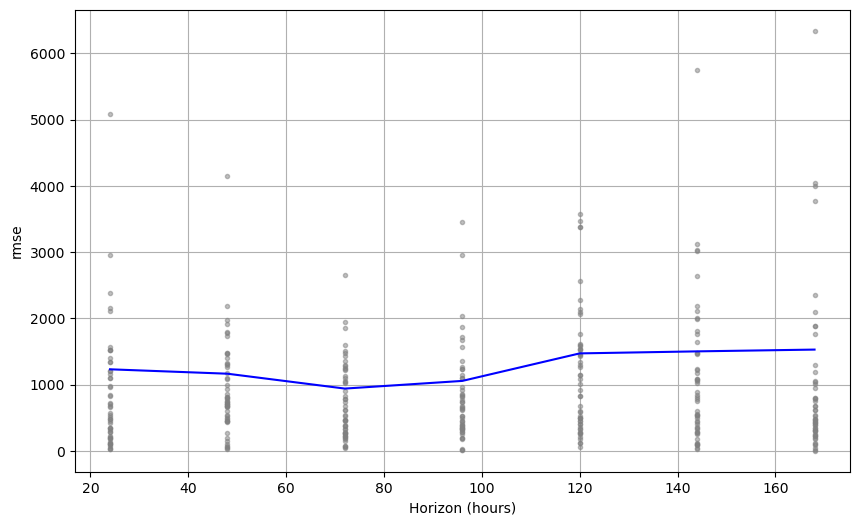

In [30]:
# Task: Plot the RMSE score with plot_cross_validation_metric() on the cross validation results
fig2 = plot_cross_validation_metric(cv_results1, metric='rmse')

In [31]:
# Task: Instantiate the Prophet class into a variable called prophet2 and add the US holidays component to the model
prophet2 = Prophet()
prophet2.add_country_holidays(country_name='US')

In [32]:
#Add a monthly seasonal component to the model with period=30.5 and fourier_order=5
prophet2.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [33]:
# Task: Fit the model with the prepared data
prophet2.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -49.0898


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1256.69   0.000164625        71.498      0.8887      0.8887      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1257.43   0.000153477       87.7195           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     261       1257.46   1.51404e-05       52.8185   2.191e-07       0.001      383  LS failed, Hessian reset 
     299       1257.49   4.89258e-07       58.8567      0.2669      0.2669      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     319        1257.5   3.58284e-06        44.016   5.695e-08       0.001      504  LS failed, Hessian reset 
     399        1257.5   3.22705e-07       71.0131       0.452       0.452      623   
    Iter      log prob        ||dx||      ||grad||       alpha

In [34]:
# Task: Save the fitted model into the folder models as a file called prophet_month.joblib
dump(prophet2,  '../models/prophet_month.joblib')

['../models/prophet_month.joblib']

In [35]:
# Task: Forecast the future dates with predict() and save the results in a variable called forecast2
forecast2 = prophet2.predict(future)

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


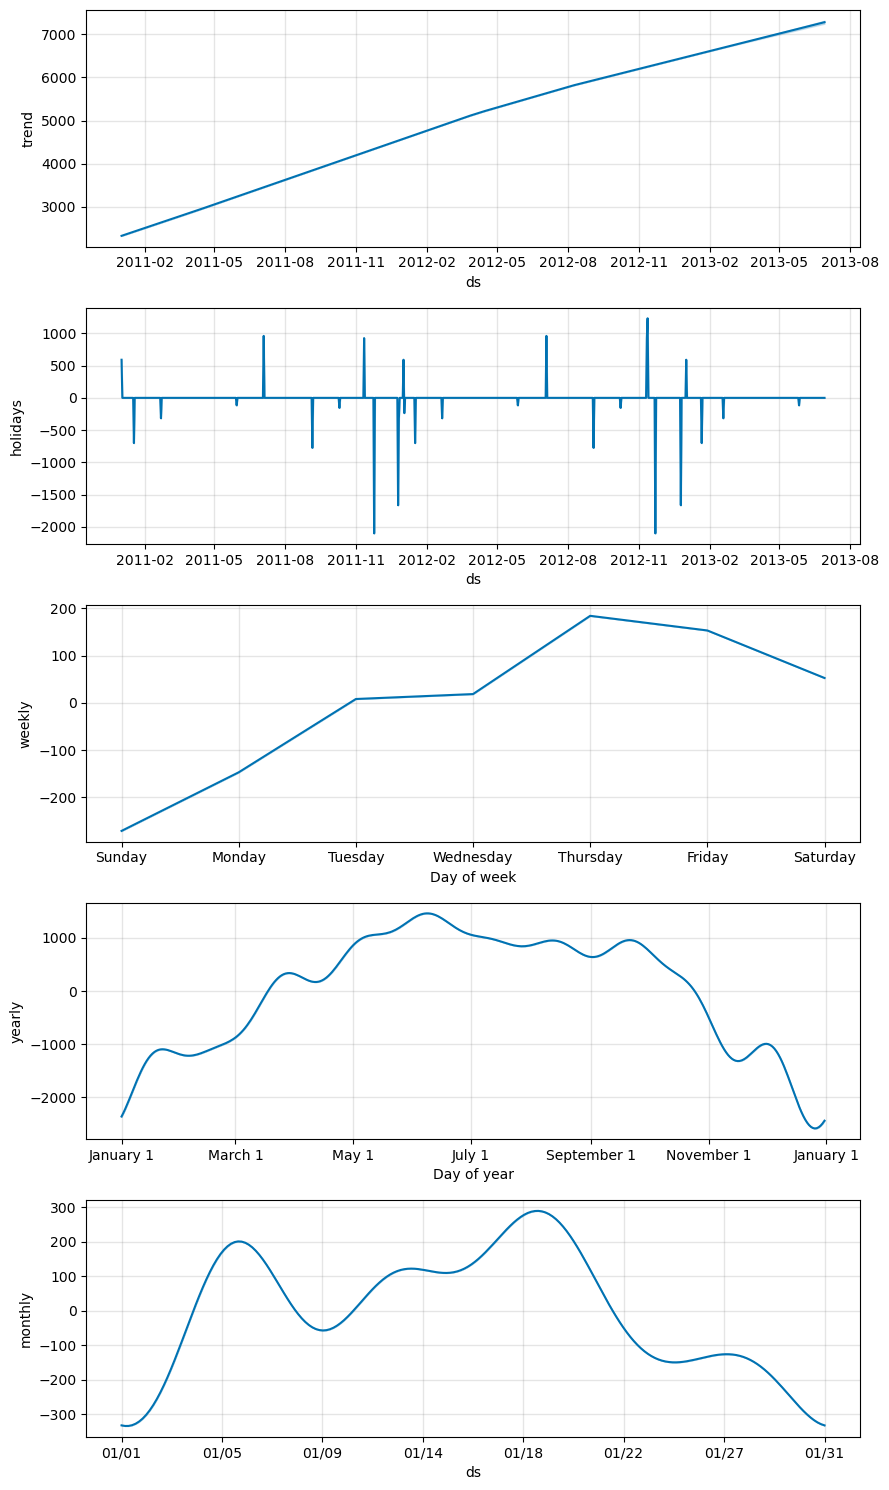

In [36]:
# Task: Print the components of this model on the predictions
fig1 = prophet2.plot_components(forecast2)

In [37]:
# Task: Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')
cv_results2 = cross_validation(prophet2, initial='365 days', period='7 days', horizon='7 days')

INFO:fbprophet:Making 52 forecasts with cutoffs between 2012-01-02 00:00:00 and 2012-12-24 00:00:00


  0%|          | 0/52 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.9966
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       631.644   1.30665e-07       102.421           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       631.644   2.16872e-08       104.502      0.1875       0.964      140   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.1686
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      87       639.312    0.00191605       98.9918   1.909e-05       0.001      169  LS failed, Hessian reset 
      99       639.475   0.000197762        101.21      0.6156      0.6156      183   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        639.95   2.34309e-06       98.0464      0.3348      0.3348      307   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       639.951   1.11923e-08       98.3295      0.2167           1      343   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.2119
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       651.355   0.000378802       111.233   4.175e-06       0.001      141  LS failed, Hessian reset 
      99       651.391   0.000412473       125.893           1           1      151   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176        651.98   1.50324e-08       90.8654      0.2158      0.6729      248   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.2598
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       663.864   1.53739e-05       100.453      0.5383      0.5383      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       663.867   2.04155e-08        100.68      0.7873      0.7873      179   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.2732
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       670.078   3.44547e-07       92.0535      0.2739           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       670.078   9.74843e-09       103.079      0.4466      0.4466      163   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -16.7895
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       682.186   1.08767e-05       102.127      0.7835      0.7835      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       682.187   1.40765e-08       98.1185      0.4124      0.4124      157   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.9786
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       689.165   0.000127561       89.4699      0.9057      0.9057      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       689.327   4.72889e-07       99.9071      0.6878      0.6878      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       689.327   1.87704e-08       94.4938      0.1529      0.6044      290   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.1456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       702.294   0.000277892       99.7634      0.8734      0.8734      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       702.316   8.02474e-07       99.8612   8.039e-09       0.001      212  LS failed, Hessian reset 
     150       702.316   5.61557e-09       98.3352      0.1583      0.1583      229   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.7254
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       710.857   0.000397042       109.666           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       711.141    0.00290489       111.538   2.553e-05       0.001      185  LS failed, Hessian reset 
     192       711.526   6.04247e-06       101.931   5.982e-08       0.001      316  LS failed, Hessian reset 
     199       711.526   1.31698e-06       98.6514      0.3053           1      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       711.526   2.73833e-08       99.5925      0.6373      0.6373      344   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -20.4759
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       719.715   1.52857e-05       99.4058           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       719.758   9.18947e-05       101.257   8.985e-07       0.001      191  LS failed, Hessian reset 
     171       719.777   2.63909e-08       100.483           1           1      260   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.3278
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       729.475   0.000167794       98.9713      0.8268      0.8268      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       729.589   5.51095e-05       98.4826      0.4393           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227        729.59   1.80063e-08       99.8592      0.5155      0.5155      279   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -11.1783
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       839.674    0.00038168       72.4374      0.3321           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       839.853   0.000179715       43.6139    2.56e-06       0.001      269  LS failed, Hessian reset 
     191       839.855   7.40282e-05       49.3536    1.42e-06       0.001      312  LS failed, Hessian reset 
     196       839.856   1.62052e-05       21.4363   2.665e-07       0.001      356  LS failed, Hessian reset 
     199       839.856   8.39762e-07       36.4053      0.6145      0.6145      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       839.876   2.90257e-06       33.5824   5.044e-08       0.001      539  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha   

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.21724
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      64       866.608   0.000822804       58.0362   1.807e-05       0.001      111  LS failed, Hessian reset 
      75       866.645   4.42444e-05       24.4658   1.276e-06       0.001      166  LS failed, Hessian reset 
      85       866.654   0.000117602       37.6043   2.499e-06       0.001      225  LS failed, Hessian reset 
      99       866.657   8.75835e-06       46.4029      0.7097      0.7097      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       866.724   0.000373074       51.5172       1e-05       0.001      316  LS failed, Hessian reset 
     137       866.741   8.41452e-06       55.4215   3.267e-07       0.001      363  LS failed, Hessian reset 
     170       866.744   6.93546e-07       36.8092           1           1      421   
Optimization terminated normally: 
  Convergen

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.52764
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      74       879.285   7.34885e-05       47.5987   1.839e-06       0.001      140  LS failed, Hessian reset 
      92        879.29     1.295e-07       36.3716   4.146e-09       0.001      207  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.20871
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      57       889.405    0.00090745       94.7438   9.313e-06       0.001      111  LS failed, Hessian reset 
      81       890.216   0.000793069       73.1228   1.021e-05       0.001      183  LS failed, Hessian reset 
      99       890.289    0.00015746       47.4223           1           1      219   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       890.308   0.000217935       44.9148   4.321e-06       0.001      325  LS failed, Hessian reset 
     145       890.323   5.12519e-06       36.4096    1.33e-07       0.001      389  LS failed, Hessian reset 
     155       890.323    5.3107e-08       40.3259   1.574e-09       0.001      442  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.0244
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       903.571    0.00448315       52.5951      0.3653           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       903.658   3.32047e-05       47.0695   5.996e-07       0.001      226  LS failed, Hessian reset 
     148       903.659   1.78948e-06       43.7822   3.748e-08       0.001      295  LS failed, Hessian reset 
     156       903.659   2.83852e-09       41.0407     0.04821      0.1394      312   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.9244
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       885.914   5.28035e-05       42.9308   1.847e-06       0.001      170  LS failed, Hessian reset 
      99       885.921   4.36741e-05       32.7604   8.215e-07       0.001      218  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       885.921    4.1234e-07       35.0091   1.243e-08       0.001      276  LS failed, Hessian reset 
     112       885.921   9.19636e-08       35.0094      0.4509      0.4509      280   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.52444
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98       897.449   0.000286935       36.7845   5.589e-06       0.001      168  LS failed, Hessian reset 
      99       897.452   9.85419e-05       52.5758      0.8533      0.8533      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       897.567   0.000570847       62.8749           1           1      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       897.576   0.000144861       64.2008    2.36e-06       0.001      411  LS failed, Hessian reset 
     229       897.578   6.16879e-07       42.2982   2.157e-08       0.001      464  LS failed, Hessian reset 
     290       897.655   6.42157e-07       31.6969   1.642e-08       0.001      615  LS failed, Hessian reset 
     295       897.655   4.87403e-08       30.5207      0.5506   

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.86709
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       912.989   3.95299e-06       50.1146   1.008e-07       0.001      146  LS failed, Hessian reset 
      99       913.008   0.000229722       48.5801      0.1353           1      178   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195       913.367   1.95599e-05       35.9746   2.861e-07       0.001      371  LS failed, Hessian reset 
     199       913.367   4.94745e-06       40.0088       1.705      0.7388      377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       913.367   1.06672e-09       42.9069   0.0002013           1      385   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -20.172
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       913.641    0.00158068       109.776      0.3768           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       914.404   0.000735808       61.2483   1.558e-05       0.001      223  LS failed, Hessian reset 
     199       914.592   1.19447e-05       80.4473       0.366           1      307   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     295       914.625   3.61548e-06       76.4685   6.295e-08       0.001      468  LS failed, Hessian reset 
     299       914.625   3.98186e-06       71.9293           1           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     346       914.628   6.98386e-09       72.4595     0.08671     0.08671      538   
Optimization terminate

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -12.718
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       921.758    0.00124543        103.06           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       921.869   0.000972114       94.5341   9.839e-06       0.001      159  LS failed, Hessian reset 
     199       921.937    0.00227749       92.4797           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     284       922.104    6.2634e-08       85.2689      0.3197           1      388   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.79661
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       937.298   7.26328e-05       70.3754      0.2024           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       937.323    0.00609136       117.411           1           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       937.452   0.000168526       98.2298   2.021e-06       0.001      336  LS failed, Hessian reset 
     294       937.479   4.82068e-08       84.5155       0.233           1      420   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.9079
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       945.313   1.98988e-05       60.6692           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       945.317   1.71592e-05       87.2712   2.092e-07       0.001      172  LS failed, Hessian reset 
     154       945.319   1.31313e-05       81.8818   1.274e-07       0.001      282  LS failed, Hessian reset 
     177        945.32   4.52278e-08       71.8232     0.03405           1      318   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.2184
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       960.704   0.000371718       90.4654      0.3626           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       960.781   1.59066e-07       51.6024      0.2166           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       960.781   7.11087e-08       72.1305     0.09632           1      265   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -11.8405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       969.506    0.00158441       74.3658      0.2907      0.2907      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147        969.99    0.00117306       143.962   1.193e-05       0.001      218  LS failed, Hessian reset 
     196       970.234   1.86102e-08       89.4593       0.402       0.402      277   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.2576
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       983.991   0.000165173         99.19           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       984.014    6.2383e-09       102.054      0.1081      0.1081      212   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.1323
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      72       995.219   0.000870769       87.0231    8.37e-06       0.001      121  LS failed, Hessian reset 
      99       995.261   5.10798e-05       97.3506           1           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155        995.71   0.000623196       99.8522   6.109e-06       0.001      257  LS failed, Hessian reset 
     199       995.764   0.000141944       105.615      0.3108           1      311   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240        995.77   3.55451e-08       89.0714      0.2093           1      362   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.1325
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1004.63   5.48942e-06       82.1993      0.3112      0.3112      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       1004.65   7.14891e-05       68.6116   7.616e-07       0.001      185  LS failed, Hessian reset 
     181       1004.65   4.33217e-08       70.7036      0.8562      0.8562      276   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.2324
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1019.2   8.23762e-06       78.7321      0.2535           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129        1019.2   7.33665e-08       90.5486      0.2046           1      169   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.3454
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1029.72   0.000311808       75.3132           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1029.85   5.13016e-05       96.6729           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       1029.86   6.29488e-06       77.5432   8.108e-08       0.001      334  LS failed, Hessian reset 
     299       1029.86   5.82068e-08       81.3728      0.1928      0.9494      410   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.4246
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1041.45   0.000129733       86.6524        0.84        0.84      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1041.52   1.36142e-05       103.803           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       1041.52   2.03133e-05       100.689   1.856e-07       0.001      281  LS failed, Hessian reset 
     235       1041.52   3.68099e-08       86.7434      0.4456      0.4456      320   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.3083
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1055.16   1.45192e-05       78.1827      0.3388      0.3388      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1055.33   2.51754e-05       83.1825           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1055.48     0.0124312       122.707           1           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     302       1055.61    0.00153887       113.035   1.427e-05       0.001      401  LS failed, Hessian reset 
     344       1055.72   1.00094e-05       91.4714   1.104e-07       0.001      487  LS failed, Hessian reset 
     366       1055.72   4.50615e-08       87.4978      0.2431           1      520   
Optimization terminat

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.2599
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1069.7   4.95311e-06       94.8883           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       1069.72   4.34658e-08       87.7101      0.7539      0.7539      171   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.5414
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       1081.48   0.000112434       94.3474   1.158e-06       0.001      152  LS failed, Hessian reset 
      99       1081.48   1.27144e-05       90.4863      0.2011      0.7134      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       1081.49   3.53612e-08       87.0341      0.3025           1      205   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.3586
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1093.93   0.000120091       90.6327      0.6803      0.6803      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       1093.94   2.73331e-05        85.688   2.929e-07       0.001      163  LS failed, Hessian reset 
     143       1093.94    2.3983e-08       90.3365      0.3743      0.3743      213   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -11.9127
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1106.19   0.000150037       92.1216           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       1106.24   0.000240727       95.9247   2.857e-06       0.001      179  LS failed, Hessian reset 
     199       1106.38   0.000753675       98.0576           1           1      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       1106.75   0.000429001       95.9887   4.337e-06       0.001      359  LS failed, Hessian reset 
     294       1106.81   3.76225e-08       83.1311      0.4027           1      428   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.6431
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1118.21   1.08823e-05       102.495           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1118.3   8.41426e-05       70.5131           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1118.34   6.44117e-07       86.2485      0.5958      0.5958      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     319       1118.34   2.96564e-08       91.8863      0.3351           1      389   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.93761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1154.87   1.92471e-05       64.2657           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       1154.88   7.00877e-07       63.9312      0.6766      0.6766      216   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.88738
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1160.09   0.000136398       72.6817           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       1160.13   8.59486e-05       76.6936   9.506e-07       0.001      211  LS failed, Hessian reset 
     162       1160.14   5.66739e-09       80.5761    0.005961     0.01943      250   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.3523
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1173.54    0.00272808       98.7301           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     174       1173.84    2.3427e-06        80.404   2.858e-08       0.001      264  LS failed, Hessian reset 
     188       1173.84   1.35134e-08       47.9888      0.2125      0.2125      280   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.2981
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1176.04   0.000671978       75.8538           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172        1176.4   9.39704e-09       54.3403      0.1672      0.1672      213   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -13.657
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1190.5   0.000811239       67.6977      0.5449      0.5449      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171        1190.6    0.00115944       81.7304   2.284e-05       0.001      249  LS failed, Hessian reset 
     199       1190.63   4.81194e-06       67.4348           1           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       1190.64   1.04858e-05        81.244   1.381e-07       0.001      377  LS failed, Hessian reset 
     293       1190.65    5.3168e-08       50.1838      0.1832      0.1832      462   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.4135
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1202.17   0.000163196       60.8821      0.7397      0.7397      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1202.49   2.51285e-05       78.3978      0.6235           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1202.53   8.06227e-06       59.3209       0.234           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330       1202.54    2.4918e-05       75.7067   3.717e-07       0.001      468  LS failed, Hessian reset 
     399       1202.54   0.000131745       78.0031       0.876       0.876      561   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     479       1202.55   7.26746e-08    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -93.3285
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1188.37    0.00772682        84.381      0.7227      0.7227      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1189.2   3.09883e-06       52.8267      0.4843      0.4843      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     288       1189.56    0.00119916       98.6948   1.537e-05       0.001      406  LS failed, Hessian reset 
     299       1189.63   0.000150781       89.8244      0.2406           1      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1189.66   0.000186407       66.8987           1           1      543   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     454       1189.68   3.68685e-08    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.5559
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       1190.64    0.00140969       111.916   1.483e-05       0.001      154  LS failed, Hessian reset 
      99        1190.7    0.00147333       108.115           1           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153        1190.9   0.000194045       89.0354   2.631e-06       0.001      262  LS failed, Hessian reset 
     189       1190.95   1.58738e-05       85.0568   2.302e-07       0.001      350  LS failed, Hessian reset 
     199       1190.95   4.40065e-06       69.3525           1           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1190.96   4.21923e-06        74.965      0.1505      0.5874      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -13.5307
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      69        1204.7   0.000543926       101.106   5.258e-06       0.001      121  LS failed, Hessian reset 
      99       1204.81   0.000259204       55.3935           1           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1205.18   3.99807e-06        36.341           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       1205.18   3.48976e-07       63.6264   6.129e-09       0.001      369  LS failed, Hessian reset 
     295       1205.19   9.39557e-08        72.009           1           1      455   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.6427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1219.24    0.00425761       107.858           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       1219.63   0.000144847        75.676   1.728e-06       0.001      168  LS failed, Hessian reset 
     168       1219.65   1.03166e-07       83.3068      0.2257           1      237   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -20.8983
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1221.06   0.000301953       67.1215           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       1221.51    0.00151236        101.46   1.432e-05       0.001      189  LS failed, Hessian reset 
     199       1221.89   3.59172e-05       75.3789           1           1      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       1221.92   2.17169e-05       102.908   2.244e-07       0.001      413  LS failed, Hessian reset 
     299       1221.92   2.82047e-08       75.2324      0.2401      0.2401      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       1221.92   1.66804e-08       78.6187      0.2065           1      449   
Optimization terminat

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -14.7677
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1235.66    0.00174536       94.7439           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127        1235.8   2.84488e-05       102.671   3.293e-07       0.001      206  LS failed, Hessian reset 
     199       1235.87   6.64671e-06       83.0383           1           1      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     289       1235.88   7.90908e-08        91.866      0.8747      0.8747      399   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -20.9593
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1248.53   0.000118654       94.6232      0.4069      0.4069      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       1248.82   0.000817498       91.9137   7.832e-06       0.001      228  LS failed, Hessian reset 
     199        1248.9   1.30272e-05       83.0369      0.9323      0.9323      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     288       1248.92   6.39528e-06       95.0392   6.284e-08       0.001      430  LS failed, Hessian reset 
     299       1248.92   2.09193e-07        77.106      0.8392      0.8392      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       1248.92   9.63442e-08       71.6406      0.7103      0.7103      450   
Optimization terminat

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.0571
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1263.07   6.75518e-05       101.041      0.4303           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1263.14   6.79616e-05       101.958           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     255       1263.19    5.1286e-08       97.0736      0.3547           1      307   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.9283
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1259.02    0.00489136       114.816      0.2032           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       1260.96    0.00254623       103.159   2.759e-05       0.001      250  LS failed, Hessian reset 
     199       1261.22   0.000235502       88.7771       2.082       0.468      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1261.23    8.2351e-07       64.5213           1           1      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331       1261.31   6.39063e-05       77.6665   7.623e-07       0.001      527  LS failed, Hessian reset 
     399       1261.35   3.93708e-07       73.7354      0.2766           1      614   
    Iter      log pro

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
